**TASk 1**

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [9]:
# 1. Load and Prepare Data
time_df = pd.read_csv('/content/time.csv', skiprows=1, header=None, names=['time'])
X_df = pd.read_csv('/content/X.csv', skiprows=1, header=None, names=['x1', 'x2'])
y_df = pd.read_csv('/content/y.csv', skiprows=1, header=None, names=['y'])

# Combine all data into a single DataFrame
data = pd.concat([time_df, X_df, y_df], axis=1)

# Display basic info
print('Dataset Info:')
data.info()
print('\nFirst 5 Rows of Data:')
print(data.head())
print('\nMissing Values:')
print(data.isnull().sum())
print('\nSummary Statistics:')
print(data.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    200 non-null    float64
 1   x1      200 non-null    float64
 2   x2      200 non-null    int64  
 3   y       200 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 6.4 KB

First 5 Rows of Data:
   time        x1  x2          y
0   0.1 -1.383423   0  10.677616
1   0.2  0.491178   0  18.885513
2   0.3 -0.528827   0  11.246081
3   0.4 -0.359455   0   9.364583
4   0.5  0.173340   0  13.434298

Missing Values:
time    0
x1      0
x2      0
y       0
dtype: int64

Summary Statistics:
             time          x1          x2           y
count  200.000000  200.000000  200.000000  200.000000
mean    10.050000    0.065065    0.500000   18.604033
std      5.787918    1.042515    0.501255   11.879710
min      0.100000   -3.066635    0.000000    1.041340
25%      5.075000   -0.68026

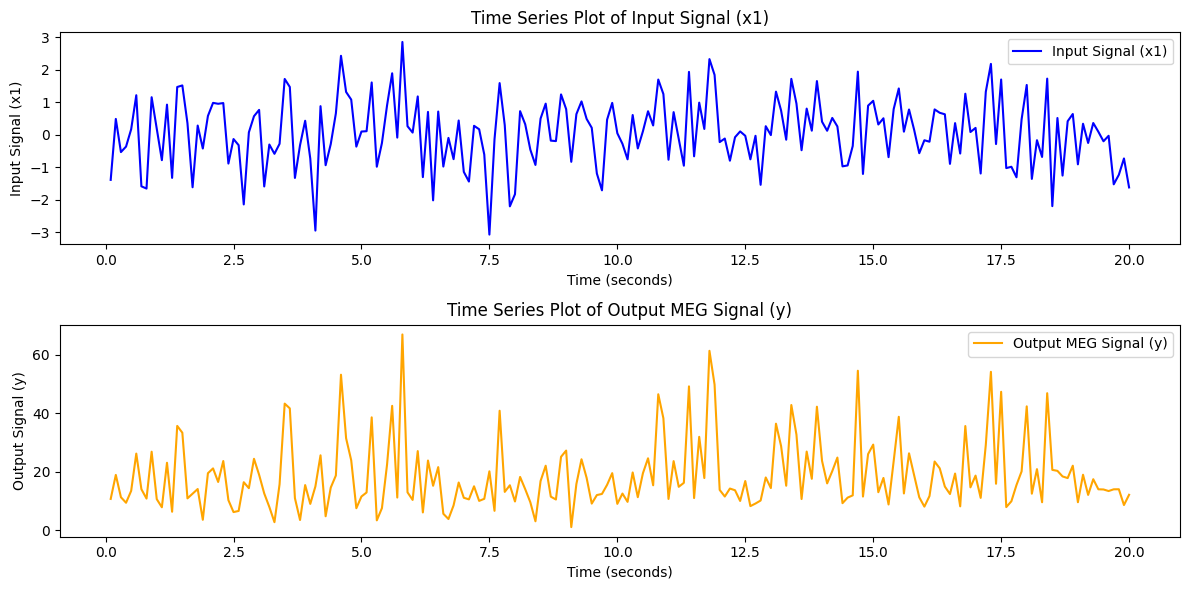

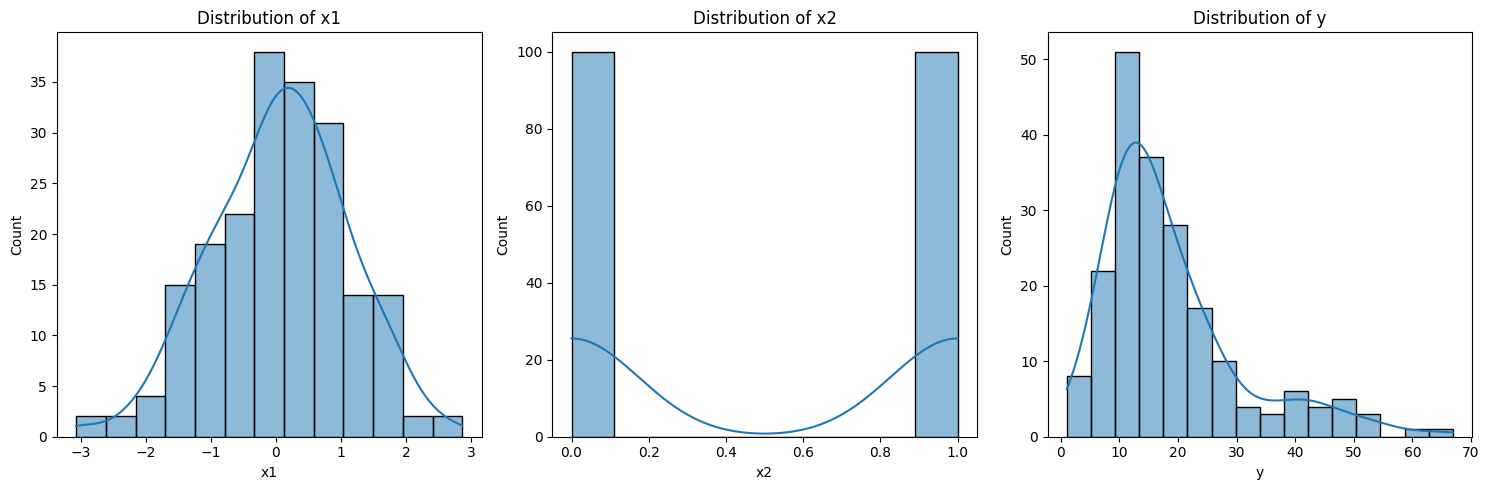


Correlation Matrix:
          time        x1        x2         y
time  1.000000  0.010595  0.866036  0.105834
x1    0.010595  1.000000  0.068295  0.765365
x2    0.866036  0.068295  1.000000  0.170451
y     0.105834  0.765365  0.170451  1.000000


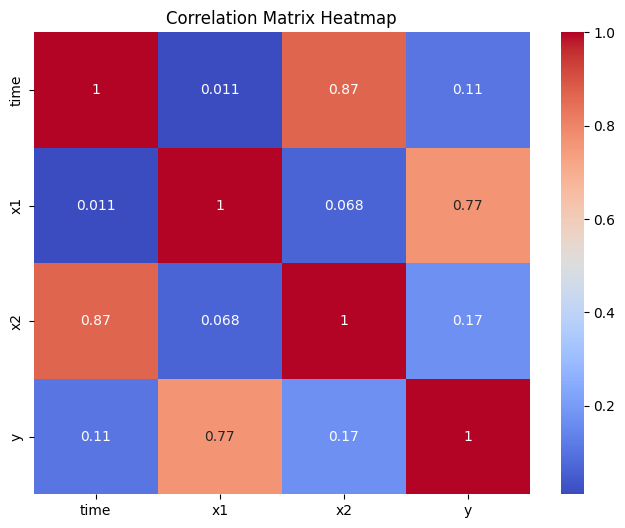

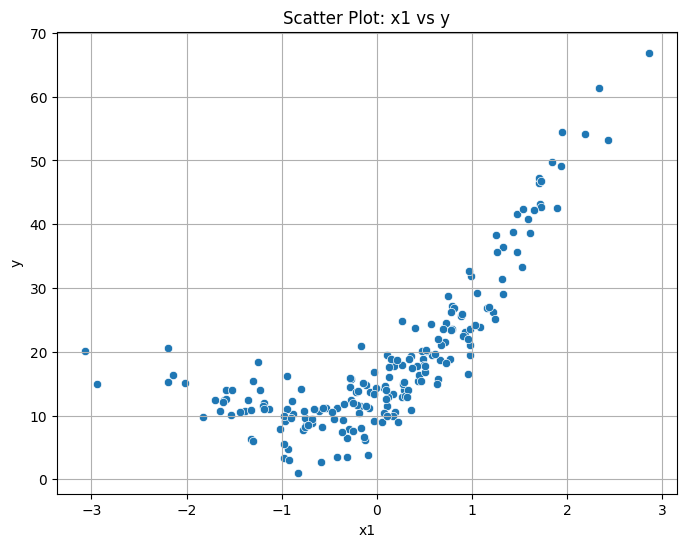

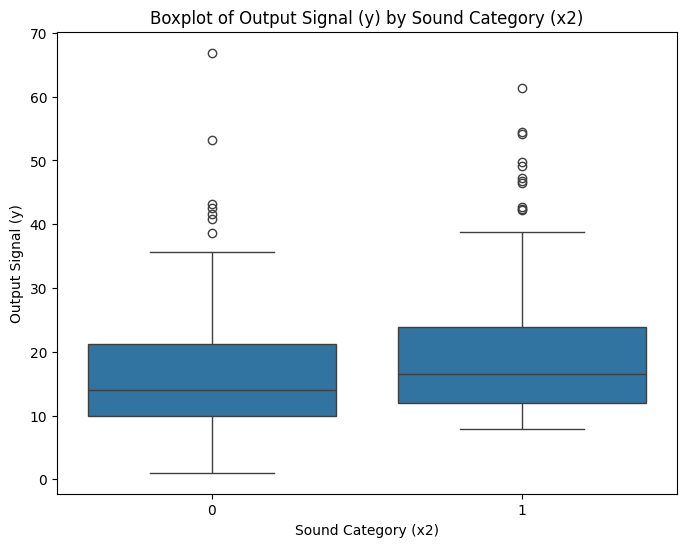

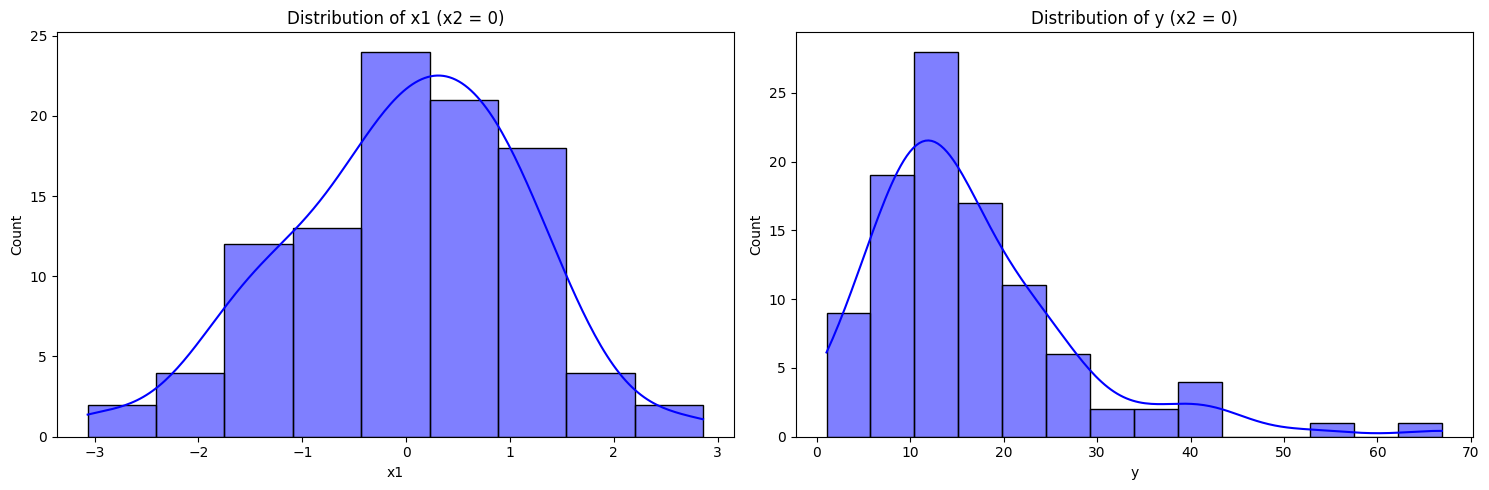

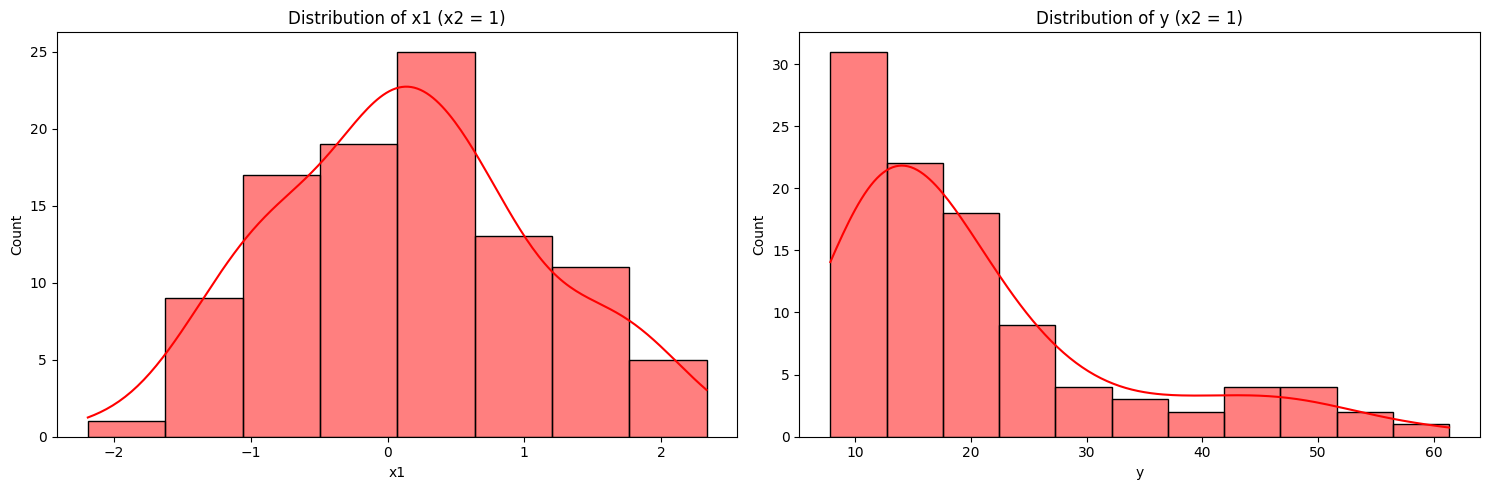

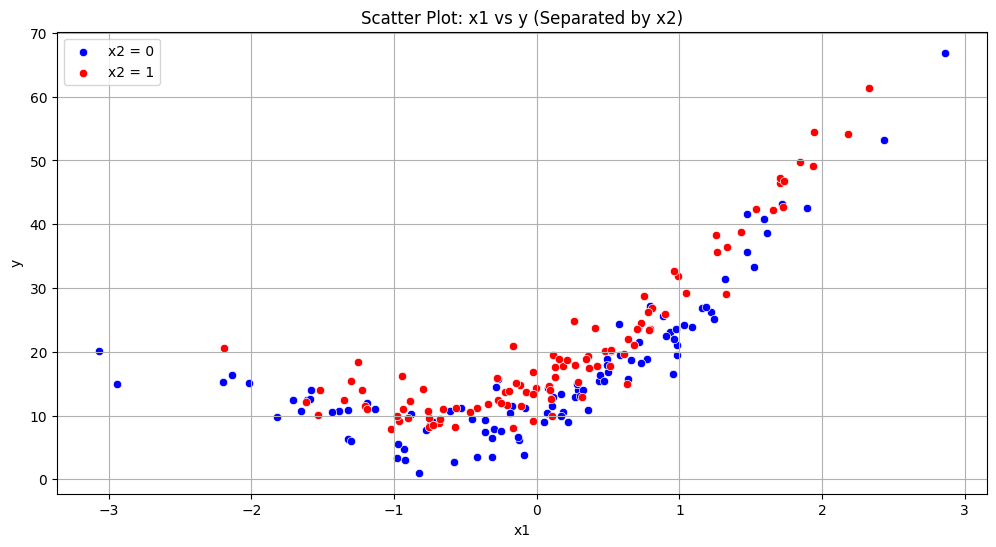

In [10]:
# 2. Time Series Plots
plt.figure(figsize=(12, 6))

# Plotting the input signal (x1) over time
plt.subplot(2, 1, 1)
plt.plot(data['time'], data['x1'], label='Input Signal (x1)', color='blue')
plt.xlabel('Time (seconds)')
plt.ylabel('Input Signal (x1)')
plt.title('Time Series Plot of Input Signal (x1)')
plt.legend()

# Plotting the output signal (y) over time
plt.subplot(2, 1, 2)
plt.plot(data['time'], data['y'], label='Output MEG Signal (y)', color='orange')
plt.xlabel('Time (seconds)')
plt.ylabel('Output Signal (y)')
plt.title('Time Series Plot of Output MEG Signal (y)')
plt.legend()

plt.tight_layout()
plt.show()


# 3. Distribution Analysis
plt.figure(figsize=(15, 5))

# Plotting distributions for x1, x2, and y
for i, col in enumerate(['x1', 'x2', 'y'], 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


# 4. Correlation & Scatter Plots
# Correlation Matrix
print('\nCorrelation Matrix:')
print(data.corr())

# Heatmap of Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Scatter plot between x1 and y
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['x1'], y=data['y'])
plt.title('Scatter Plot: x1 vs y')
plt.xlabel('x1')
plt.ylabel('y')
plt.grid(True)
plt.show()


# 5. Boxplots
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['x2'], y=data['y'])
plt.title('Boxplot of Output Signal (y) by Sound Category (x2)')
plt.xlabel('Sound Category (x2)')
plt.ylabel('Output Signal (y)')
plt.show()


# 6. Separate Analysis by x2 (0 and 1)
data_x2_0 = data[data['x2'] == 0]
data_x2_1 = data[data['x2'] == 1]

# Distribution Analysis
plt.figure(figsize=(15, 5))
for i, col in enumerate(['x1', 'y'], 1):
    plt.subplot(1, 2, i)
    sns.histplot(data_x2_0[col], kde=True, color='blue')
    plt.title(f'Distribution of {col} (x2 = 0)')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
for i, col in enumerate(['x1', 'y'], 1):
    plt.subplot(1, 2, i)
    sns.histplot(data_x2_1[col], kde=True, color='red')
    plt.title(f'Distribution of {col} (x2 = 1)')

plt.tight_layout()
plt.show()

# Scatter Plot Comparison
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data_x2_0['x1'], y=data_x2_0['y'], label='x2 = 0', color='blue')
sns.scatterplot(x=data_x2_1['x1'], y=data_x2_1['y'], label='x2 = 1', color='red')
plt.title('Scatter Plot: x1 vs y (Separated by x2)')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

**TASK 2**

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    200 non-null    float64
 1   x1      200 non-null    float64
 2   x2      200 non-null    int64  
 3   y       200 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 6.4 KB

First 5 Rows of Data:
   time        x1  x2          y
0   0.1 -1.383423   0  10.677616
1   0.2  0.491178   0  18.885513
2   0.3 -0.528827   0  11.246081
3   0.4 -0.359455   0   9.364583
4   0.5  0.173340   0  13.434298

Missing Values:
time    0
x1      0
x2      0
y       0
dtype: int64

Summary Statistics:
             time          x1          x2           y
count  200.000000  200.000000  200.000000  200.000000
mean    10.050000    0.065065    0.500000   18.604033
std      5.787918    1.042515    0.501255   11.879710
min      0.100000   -3.066635    0.000000    1.041340
25%      5.075000   -0.68026

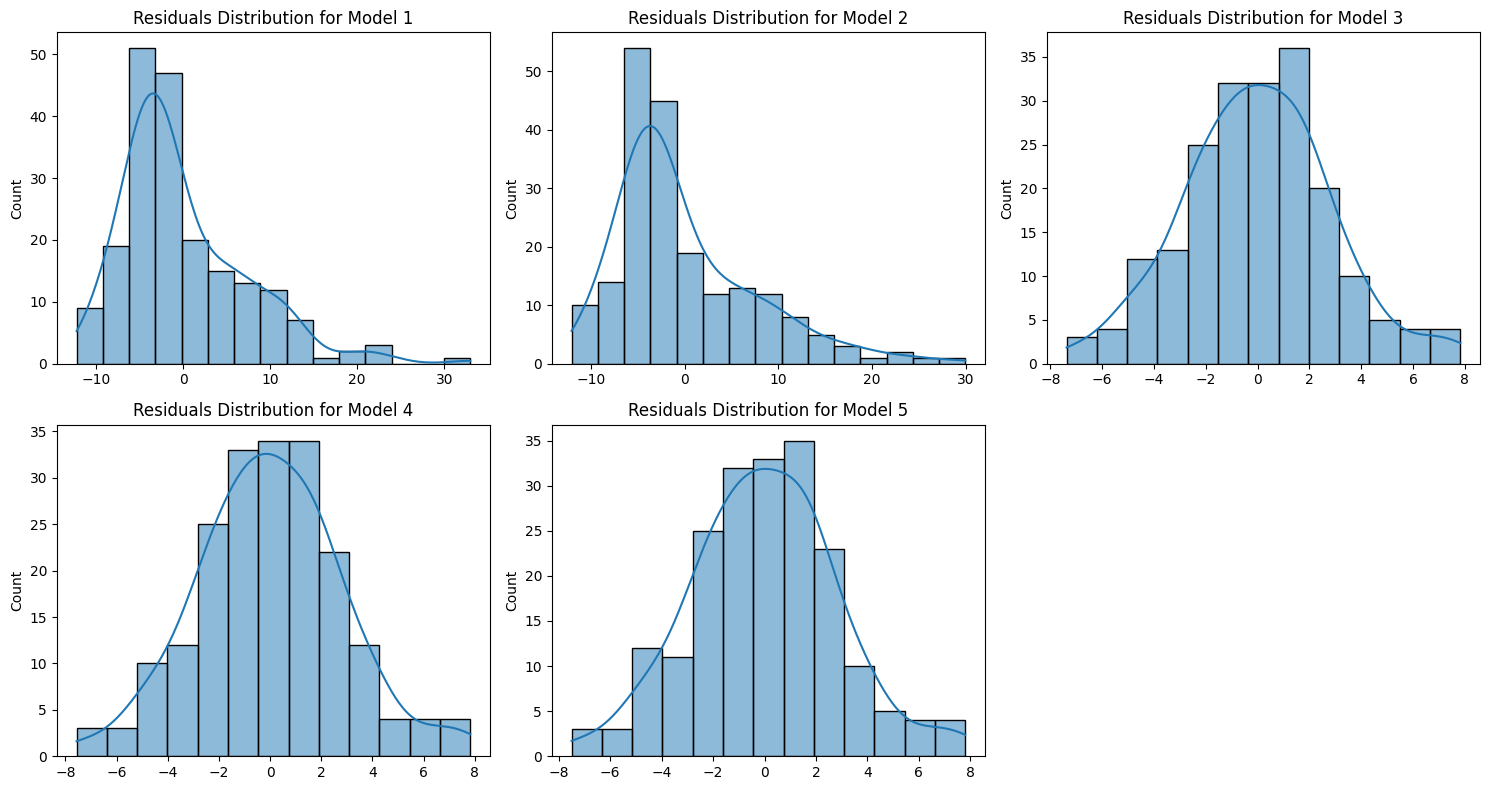

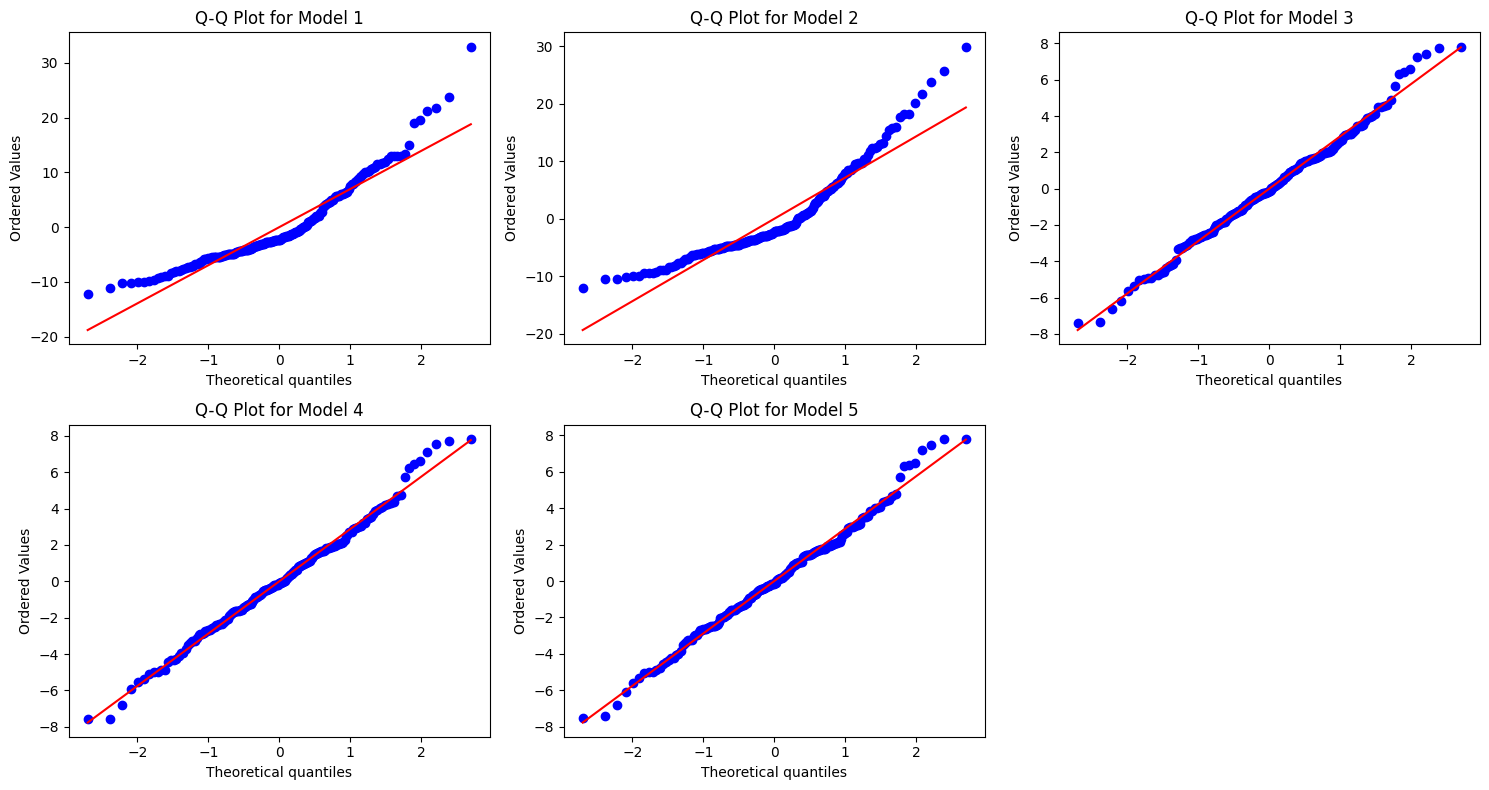

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

# 1. Load and Prepare Data
time_df = pd.read_csv('/content/time.csv', skiprows=1, header=None, names=['time'])
X_df = pd.read_csv('/content/X.csv', skiprows=1, header=None, names=['x1', 'x2'])
y_df = pd.read_csv('/content/y.csv', skiprows=1, header=None, names=['y'])

# Combine all data into a single DataFrame
data = pd.concat([time_df, X_df, y_df], axis=1)

# Display basic info
print('Dataset Info:')
data.info()
print('\nFirst 5 Rows of Data:')
print(data.head())
print('\nMissing Values:')
print(data.isnull().sum())
print('\nSummary Statistics:')
print(data.describe())

# 2. Model Parameter Estimation (Task 2.1)
# Define the candidate models

def create_model_input(data, model_type):
    x1 = data['x1'].values
    x2 = data['x2'].values
    if model_type == 1:
        X = np.column_stack([x1, x1**3, x1**5, x2, np.ones(len(x1))])
    elif model_type == 2:
        X = np.column_stack([x1, x2, np.ones(len(x1))])
    elif model_type == 3:
        X = np.column_stack([x1, x1**2, x1**4, x2, np.ones(len(x1))])
    elif model_type == 4:
        X = np.column_stack([x1, x1**2, x1**3, x1**4, x1**5, x2, np.ones(len(x1))])
    elif model_type == 5:
        X = np.column_stack([x1, x1**2, x1**3, x1**4, x2, np.ones(len(x1))])
    else:
        raise ValueError('Invalid model type. Choose between 1 and 5.')
    return X

# Generate X matrices for all models
X_models = {i: create_model_input(data, i) for i in range(1, 6)}
y = data['y'].values
n = len(y)  # Number of observations

# Fit models using Ordinary Least Squares (OLS)
theta_estimates = {}
rss_values = {}
log_likelihoods = {}
aic_values = {}
bic_values = {}
residuals_dict = {}

for model_type, X in X_models.items():
    model = sm.OLS(y, X)
    results = model.fit()
    theta_estimates[model_type] = results.params
    y_pred = results.predict(X)
    residuals = y - y_pred
    rss = np.sum(residuals ** 2)
    rss_values[model_type] = rss
    residuals_dict[model_type] = residuals

    # Log-Likelihood Calculation
    sigma_squared = rss / n
    log_likelihood = -0.5 * n * (np.log(2 * np.pi * sigma_squared) + 1)
    log_likelihoods[model_type] = log_likelihood

    # AIC & BIC Calculation
    k = X.shape[1]
    aic = 2 * k - 2 * log_likelihood
    bic = k * np.log(n) - 2 * log_likelihood
    aic_values[model_type] = aic
    bic_values[model_type] = bic

    # Displaying results
    print(f'\nModel {model_type} - Estimated Parameters (Theta Values):')
    for i, theta in enumerate(results.params):
        print(f'Theta {i}: {theta}')

    print(f'Model {model_type} - RSS: {rss}')
    print(f'Model {model_type} - Log-Likelihood: {log_likelihood}')
    print(f'Model {model_type} - AIC: {aic}')
    print(f'Model {model_type} - BIC: {bic}')

    # Finding the most influential parameters (top 2 by absolute value)
    sorted_theta = sorted(enumerate(results.params), key=lambda x: abs(x[1]), reverse=True)
    top_two = sorted_theta[:2]
    print(f'Model {model_type} - Most Influential Parameters (Top 2):')
    for index, value in top_two:
        print(f'Theta {index} (Value: {value})')

# 3. Summary of AIC and BIC for Model Selection (Task 2.6)
aic_bic_df = pd.DataFrame({
    'Model': list(aic_values.keys()),
    'AIC': list(aic_values.values()),
    'BIC': list(bic_values.values())
}).sort_values(by=['AIC', 'BIC'])

print('\nModel Selection Summary (Sorted by AIC, then BIC):')
print(aic_bic_df)

# 4. Residual Analysis (Task 2.5)
plt.figure(figsize=(15, 8))

for model_type, residuals in residuals_dict.items():
    plt.subplot(2, 3, model_type)
    sns.histplot(residuals, kde=True)
    plt.title(f'Residuals Distribution for Model {model_type}')

plt.tight_layout()
plt.show()

# Q-Q Plots for Checking Normality
plt.figure(figsize=(15, 8))
for model_type, residuals in residuals_dict.items():
    plt.subplot(2, 3, model_type)
    stats.probplot(residuals, dist='norm', plot=plt)
    plt.title(f'Q-Q Plot for Model {model_type}')

plt.tight_layout()
plt.show()


Accepted Samples: 1480 out of 10000


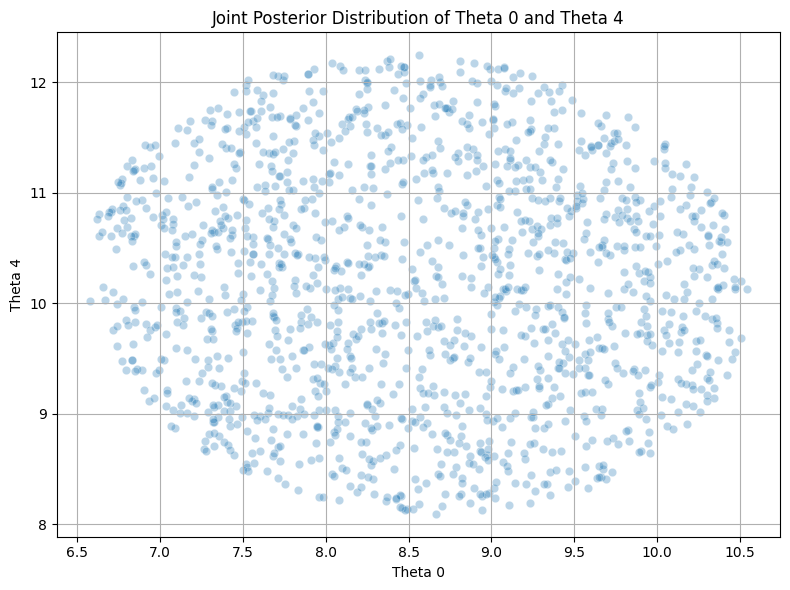

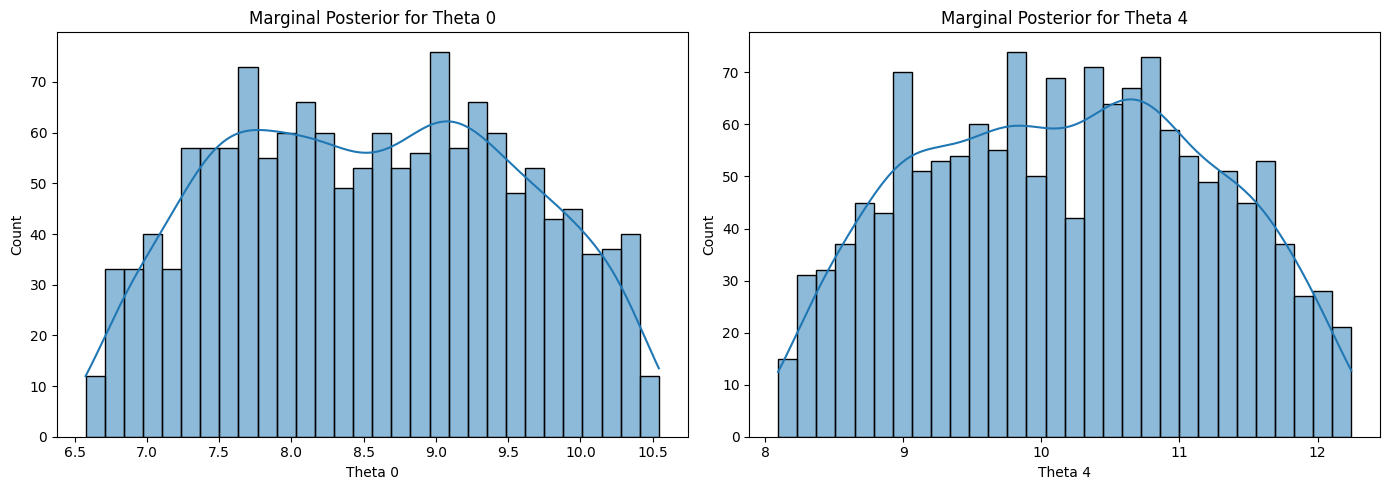

In [12]:
# ===== Task 3.1: Approximate Bayesian Computation (ABC - Rejection Sampling) =====

# Best model is Model 3
# From Task 2.1: Top 2 parameters with largest absolute values
# Theta_0 = 8.5522, Theta_4 = 10.1737
# We will vary only these two, keep others fixed.

# Estimated thetas from Model 3
theta_fixed = {
    0: 8.5522,   # To be sampled in ABC
    1: 6.2469,
    2: -0.2830,
    3: 4.1599,
    4: 10.1737   # To be sampled in ABC
}

# Load data
X_df = pd.read_csv('/content/X.csv', skiprows=1, header=None, names=['x1', 'x2'])
y_df = pd.read_csv('/content/y.csv', skiprows=1, header=None, names=['y'])
x1 = X_df['x1'].values
x2 = X_df['x2'].values
y_obs = y_df['y'].values

n_samples = 10000

# Define uniform priors around theta_0 and theta_4
prior_theta0 = np.random.uniform(theta_fixed[0] - 0.5 * abs(theta_fixed[0]), theta_fixed[0] + 0.5 * abs(theta_fixed[0]), n_samples)
prior_theta4 = np.random.uniform(theta_fixed[4] - 0.5 * abs(theta_fixed[4]), theta_fixed[4] + 0.5 * abs(theta_fixed[4]), n_samples)

accepted_theta0 = []
accepted_theta4 = []
threshold = 50  # You can adjust this epsilon threshold (tolerance for accepting prediction)

for i in range(n_samples):
    theta0 = prior_theta0[i]
    theta4 = prior_theta4[i]

    # Simulate predictions using sampled theta0 and theta4
    y_sim = (
        theta0 * x1 +
        theta_fixed[1] * x1**2 +
        theta_fixed[2] * x1**4 +
        theta_fixed[3] * x2 +
        theta4 * np.ones_like(x1)
    )

    # Distance metric (Euclidean distance)
    distance = np.linalg.norm(y_sim - y_obs)

    if distance < threshold:
        accepted_theta0.append(theta0)
        accepted_theta4.append(theta4)

accepted_theta0 = np.array(accepted_theta0)
accepted_theta4 = np.array(accepted_theta4)

print(f"Accepted Samples: {len(accepted_theta0)} out of {n_samples}")

# ===== Plot Posterior Distributions =====

# Joint Distribution
plt.figure(figsize=(8, 6))
sns.scatterplot(x=accepted_theta0, y=accepted_theta4, alpha=0.3)
plt.xlabel('Theta 0')
plt.ylabel('Theta 4')
plt.title('Joint Posterior Distribution of Theta 0 and Theta 4')
plt.grid(True)
plt.tight_layout()
plt.show()

# Marginal Histograms
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.histplot(accepted_theta0, bins=30, kde=True)
plt.title('Marginal Posterior for Theta 0')
plt.xlabel('Theta 0')

plt.subplot(1, 2, 2)
sns.histplot(accepted_theta4, bins=30, kde=True)
plt.title('Marginal Posterior for Theta 4')
plt.xlabel('Theta 4')
plt.tight_layout()
plt.show()

# ===== Task 3.2: Results Explanation (to be written in report/markdown) =====
# You can now summarize the posterior:
# - Are they symmetric or skewed?
# - Where is the mode (peak)?
# - Do they concentrate tightly around the Task 2.1 estimates or not?
# This will help explain the certainty or variability in your parameter estimates.
